# Pokemon

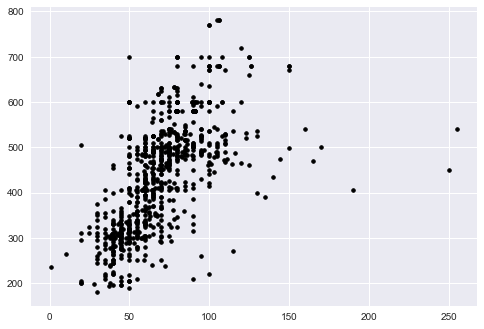

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



data_frame = pd.read_csv("data sets/Pokemon.csv")

data_frame = data_frame.drop("Type 2",axis=1).drop("Legendary",axis=1).drop("Name",axis=1).drop("#",axis=1)

col_header = list(data_frame)

plt.scatter(data_frame['HP'],data_frame['Total'],linewidths=1,c=(0,0,0),marker=".")
#plt.savefig("s.jpg",dpi=3000)
plt.show()



# Name: Name of each pokemon
# Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
# Type 2: Some pokemon are dual type and have 2
# Total: sum of all stats that come after this, a general guide to how strong a pokemon is
# HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
# Attack: the base modifier for normal attacks (eg. Scratch, Punch)
# Defense: the base damage resistance against normal attacks
# SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
# SP Def: the base damage resistance against special attacks
# Speed: determines which pokemon attacks first each round


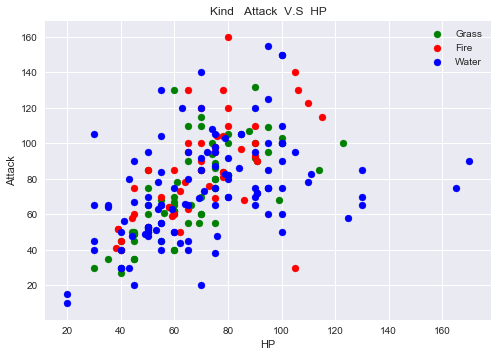

In [99]:

jet=plt.get_cmap('coolwarm')


kinds = data_frame["Type 1"]
kinds = kinds.unique()[0:3]

for k in kinds:
    X = data_frame.loc[data_frame["Type 1"]==k]['HP']
    Y = data_frame.loc[data_frame["Type 1"]==k]['Attack']
    if k == 'Water':
        plt.scatter(x=X, y=Y, c="Blue")
    elif k=="Grass":
        plt.scatter(x=X, y=Y, c="Green")
    elif k=="Fire":
        plt.scatter(x=X, y=Y, c="Red")
    else:
        plt.scatter(x=X, y=Y, cmap=jet)

plt.legend(kinds,loc='upper right')
plt.title("Kind   Attack  V.S  HP")
plt.xlabel("HP")
plt.ylabel("Attack")
#plt.scatter(,c="Blue")
plt.show()

In [107]:
from sklearn import tree

col_header # Header of data_frame Name
train_split = 550

train_data  = data_frame.loc[:,col_header[2:-1]][0:train_split]
train_label = data_frame.loc[:,'Type 1'][0:train_split]

clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_label)



print "預測的 : \n",clf.predict(data_frame.loc[:,col_header[2:-1]][550:560])
print "正確的 : \n",list(data_frame.loc[:,'Type 1'][550:560])


預測的 : 
['Psychic' 'Psychic' 'Dragon' 'Psychic' 'Poison' 'Fighting' 'Water'
 'Poison' 'Grass' 'Fire']
正確的 : 
['Grass', 'Grass', 'Normal', 'Psychic', 'Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire']


In [108]:
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
clf.fit(train_data,train_label)


print "預測的 : \n",clf.predict(data_frame.loc[:,col_header[2:-1]][550:560])
print "正確的 : \n",list(data_frame.loc[:,'Type 1'][550:560])

預測的 : 
['Dragon' 'Psychic' 'Dragon' 'Dragon' 'Normal' 'Poison' 'Electric' 'Normal'
 'Poison' 'Water']
正確的 : 
['Grass', 'Grass', 'Normal', 'Psychic', 'Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire']
